In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images,test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 1083s 6us/step


In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

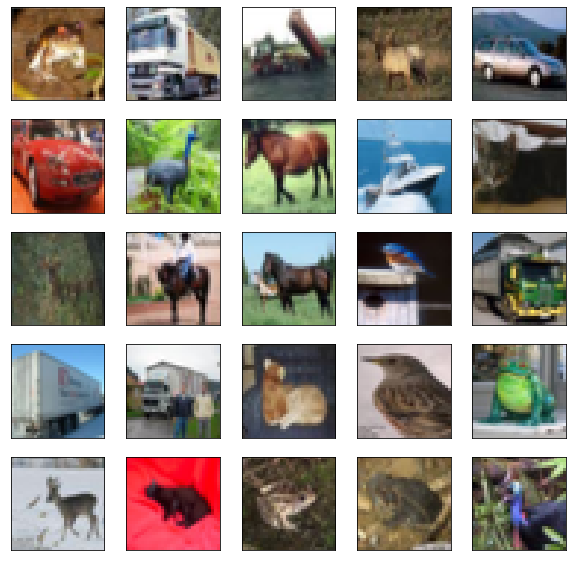

In [8]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
plt.show()

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [16]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history = model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 91s 2ms/sample - loss: 1.5440 - accuracy: 0.4370 - val_loss: 1.2544 - val_accuracy: 0.5434
Epoch 2/10
50000/50000 [==============================] - 86s 2ms/sample - loss: 1.1747 - accuracy: 0.5814 - val_loss: 1.1083 - val_accuracy: 0.6047
Epoch 3/10
50000/50000 [==============================] - 86s 2ms/sample - loss: 1.0315 - accuracy: 0.6356 - val_loss: 1.0081 - val_accuracy: 0.6481
Epoch 4/10
50000/50000 [==============================] - 87s 2ms/sample - loss: 0.9352 - accuracy: 0.6727 - val_loss: 0.9486 - val_accuracy: 0.6720
Epoch 5/10
50000/50000 [==============================] - 88s 2ms/sample - loss: 0.8561 - accuracy: 0.6982 - val_loss: 0.8942 - val_accuracy: 0.6934
Epoch 6/10
50000/50000 [==============================] - 99s 2ms/sample - loss: 0.7982 - accuracy: 0.7207 - val_loss: 0.8965 - val_accuracy: 0.6886
Epoch 7/10
50000/50000 [==============================] 

10000/10000 [==============================] - 5s 508us/sample - loss: 0.8832 - accuracy: 0.7051


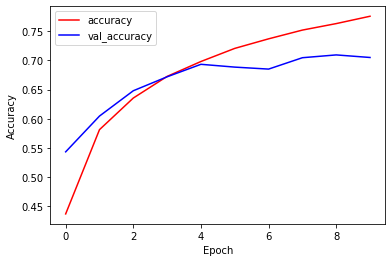

In [20]:
plt.plot(history.history['accuracy'],'r', label='accuracy')
plt.plot(history.history['val_accuracy'],'b', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
test_loss, test_acc = model.evaluate(test_images,test_labels)